In [60]:
# importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [45]:
#importing the dataset
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_18df93152cc54f2b83eb40a082f9aaba = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0BWbPnaZWJHZRokytFl0mtamdyhpJIRoPqu-bSi004gv',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_18df93152cc54f2b83eb40a082f9aaba.get_object(Bucket='predictheartfailure-donotdelete-pr-ifya1oookamwha',Key='predict_heart_failure.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


# Exploratory Data Analysis (EDA)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AVGHEARTBEATSPERMIN  10800 non-null  int64 
 1   PALPITATIONSPERDAY   10800 non-null  int64 
 2   CHOLESTEROL          10800 non-null  int64 
 3   BMI                  10800 non-null  int64 
 4   HEARTFAILURE         10800 non-null  object
 5   AGE                  10800 non-null  int64 
 6   SEX                  10800 non-null  object
 7   FAMILYHISTORY        10800 non-null  object
 8   SMOKERLAST5YRS       10800 non-null  object
 9   EXERCISEMINPERWEEK   10800 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 843.9+ KB


In [5]:
df.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


In [6]:
df.columns

Index(['AVGHEARTBEATSPERMIN', 'PALPITATIONSPERDAY', 'CHOLESTEROL', 'BMI',
       'HEARTFAILURE', 'AGE', 'SEX', 'FAMILYHISTORY', 'SMOKERLAST5YRS',
       'EXERCISEMINPERWEEK'],
      dtype='object')

In [7]:
len(df)

10800

In [8]:
df.shape

(10800, 10)

In [9]:
 df.isnull().any()

AVGHEARTBEATSPERMIN    False
PALPITATIONSPERDAY     False
CHOLESTEROL            False
BMI                    False
HEARTFAILURE           False
AGE                    False
SEX                    False
FAMILYHISTORY          False
SMOKERLAST5YRS         False
EXERCISEMINPERWEEK     False
dtype: bool

In [48]:
df.HEARTFAILURE.value_counts()

N    9012
Y    1788
Name: HEARTFAILURE, dtype: int64

In [10]:
#Partitioning the target variable from the feature variables
features_df=list(set(df.columns)-set(['HEARTFAILURE']))
features_df=df[features_df]
features_df

,PALPITATIONSPERDAY,SEX,AGE,FAMILYHISTORY,AVGHEARTBEATSPERMIN,CHOLESTEROL,EXERCISEMINPERWEEK,BMI,SMOKERLAST5YRS
0,22,F,49,N,93,163,110,25,N
1,22,F,32,N,108,181,192,24,N
2,0,F,60,N,86,239,121,20,N
3,36,F,45,Y,80,164,141,31,N
4,36,F,39,N,66,185,63,23,N
...,...,...,...,...,...,...,...,...,...
10795,27,F,31,N,122,203,246,30,N
10796,15,F,54,N,67,186,189,25,N
10797,6,F,40,N,103,211,205,20,N
10798,30,M,32,N,99,152,211,27,N


In [11]:
#5- point summary for preliminary investigation of data
features_df.describe()

,PALPITATIONSPERDAY,AGE,AVGHEARTBEATSPERMIN,CHOLESTEROL,EXERCISEMINPERWEEK,BMI
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,20.423148,49.965185,87.115093,195.080278,119.729537,26.359722
std,12.165320,13.079281,19.744375,26.136732,71.147060,3.820147
min,0.000000,28.000000,48.000000,150.000000,0.000000,20.000000
25%,10.000000,39.000000,72.000000,173.000000,58.000000,23.000000
50%,20.000000,50.000000,85.000000,196.000000,119.000000,26.000000
75%,31.000000,61.000000,100.000000,217.000000,180.000000,30.000000
max,45.000000,72.000000,161.000000,245.000000,250.000000,34.000000


In [12]:
#Correlation matrix of the features
features_df.corr()

,PALPITATIONSPERDAY,AGE,AVGHEARTBEATSPERMIN,CHOLESTEROL,EXERCISEMINPERWEEK,BMI
PALPITATIONSPERDAY,1.000000,0.009795,0.006528,0.008507,-0.009556,0.031096
AGE,0.009795,1.000000,-0.001936,-0.012401,-0.013585,-0.005033
AVGHEARTBEATSPERMIN,0.006528,-0.001936,1.000000,0.005837,-0.019575,0.050005
CHOLESTEROL,0.008507,-0.012401,0.005837,1.000000,-0.008601,0.011770
EXERCISEMINPERWEEK,-0.009556,-0.013585,-0.019575,-0.008601,1.000000,-0.035000
BMI,0.031096,-0.005033,0.050005,0.011770,-0.035000,1.000000


# Correlation Matrix

(6.5, -0.5)

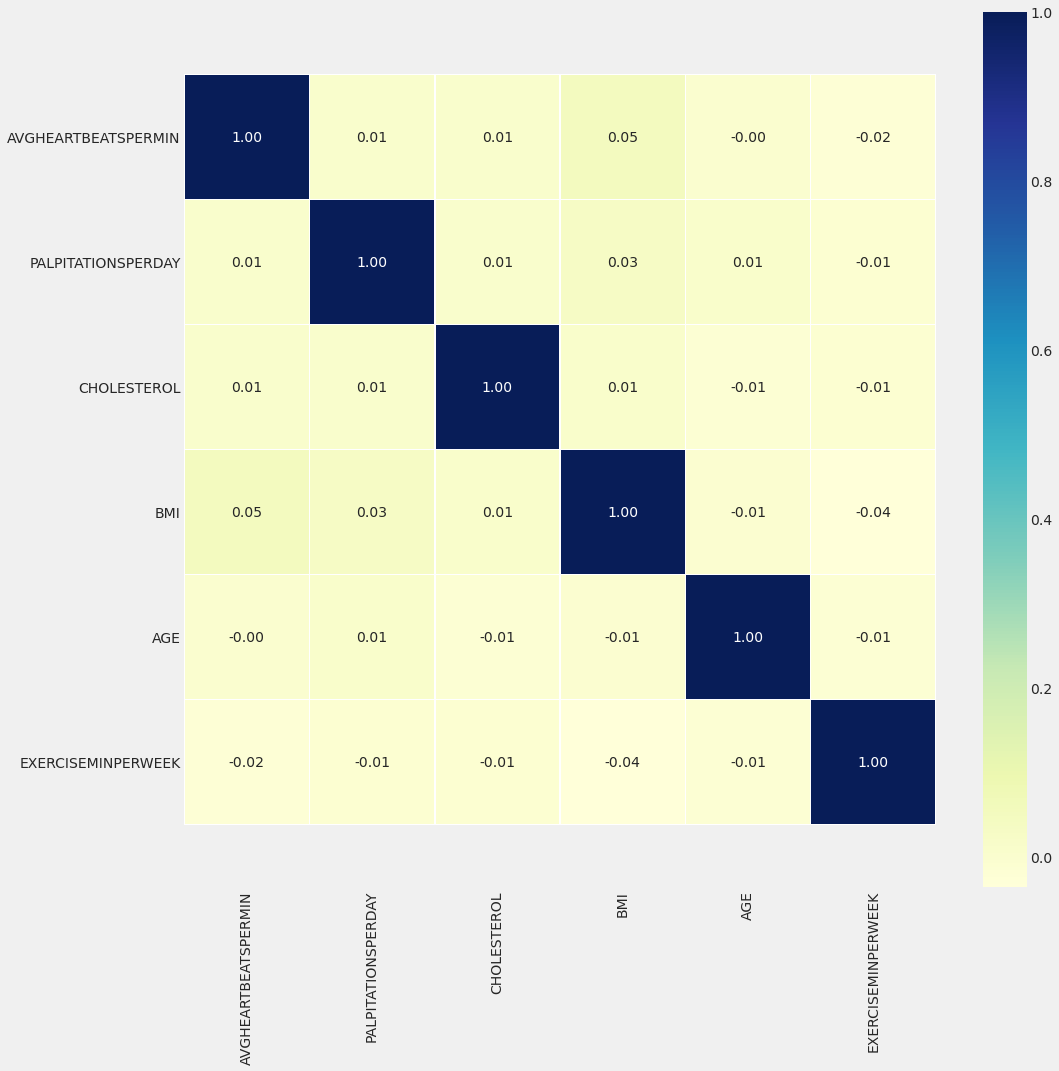

In [64]:
# Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

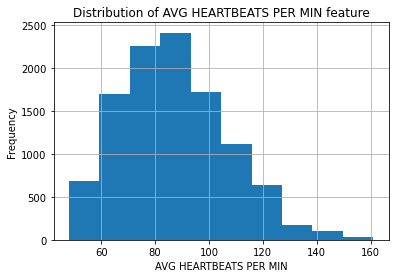

In [14]:
#Histogram to show the frequency of AVGHEARTBEATSPERMIN
import matplotlib.pyplot as plt
plt.hist(features_df['AVGHEARTBEATSPERMIN'])

plt.title('Distribution of AVG HEARTBEATS PER MIN feature')
plt.xlabel('AVG HEARTBEATS PER MIN')
plt.ylabel('Frequency')
plt.grid()

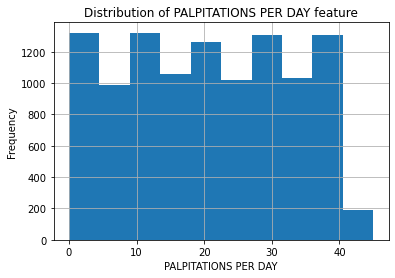

In [16]:
#Histogram to show the frequency of AVGHEARTBEATSPERMIN
plt.hist(features_df['PALPITATIONSPERDAY'])

plt.title('Distribution of PALPITATIONS PER DAY feature')
plt.xlabel('PALPITATIONS PER DAY')
plt.ylabel('Frequency')
plt.grid()

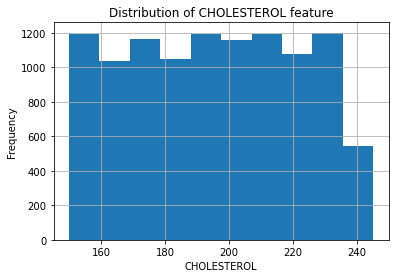

In [18]:
#Histogram to show the frequency of AVGHEARTBEATSPERMIN
plt.hist(features_df['CHOLESTEROL'])

plt.title('Distribution of CHOLESTEROL feature')
plt.xlabel('CHOLESTEROL')
plt.ylabel('Frequency')
plt.grid()

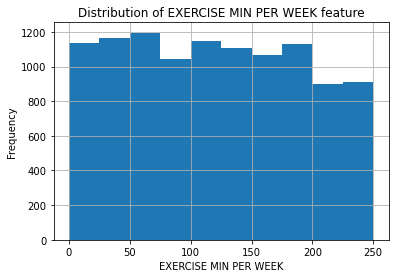

In [19]:

#Histogram to show the frequency of AVGHEARTBEATSPERMIN
plt.hist(features_df['EXERCISEMINPERWEEK'])

plt.title('Distribution of EXERCISE MIN PER WEEK feature')
plt.xlabel('EXERCISE MIN PER WEEK')
plt.ylabel('Frequency')
plt.grid()

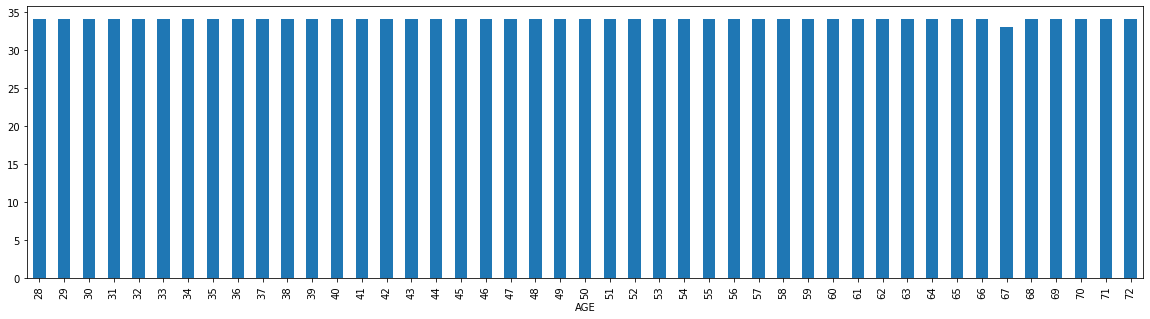

In [21]:
#Age - BMI plot
x=features_df.groupby("AGE")["BMI"].max()
plt.figure(figsize=(20,5))
x.plot.bar()

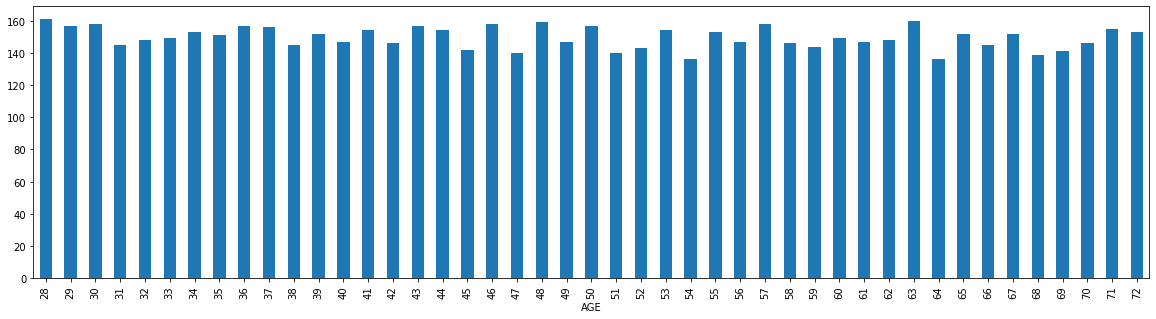

In [22]:

#Age - AVG HEART BEATS PER MIN plot
x=features_df.groupby("AGE")["AVGHEARTBEATSPERMIN"].max()
plt.figure(figsize=(20,5))
x.plot.bar()

In [23]:
#To check max value of the features
features_df.max()

PALPITATIONSPERDAY      45
SEX                      M
AGE                     72
FAMILYHISTORY            Y
AVGHEARTBEATSPERMIN    161
CHOLESTEROL            245
EXERCISEMINPERWEEK     250
BMI                     34
SMOKERLAST5YRS           Y
dtype: object

In [24]:
#To check min value of the features
features_df.min()

PALPITATIONSPERDAY       0
SEX                      F
AGE                     28
FAMILYHISTORY            N
AVGHEARTBEATSPERMIN     48
CHOLESTEROL            150
EXERCISEMINPERWEEK       0
BMI                     20
SMOKERLAST5YRS           N
dtype: object

In [25]:
df = df.reset_index()

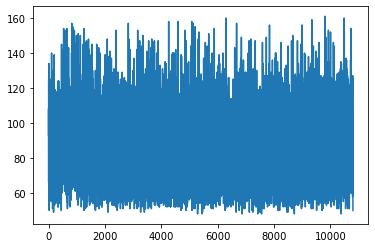

In [29]:
df['AVGHEARTBEATSPERMIN'].plot();

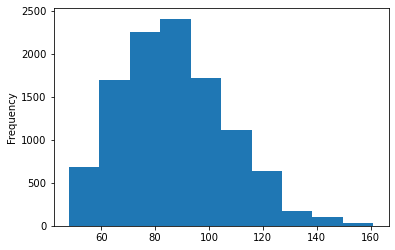

In [30]:
#You can change the number of bins to get the desired output
df['AVGHEARTBEATSPERMIN'].plot.hist(bins=10);

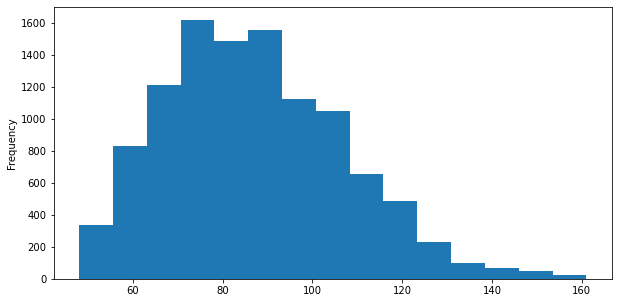

In [31]:
#Change the size of the histogram with the figsize option
df['AVGHEARTBEATSPERMIN'].plot.hist(bins=15,figsize=(10,5));

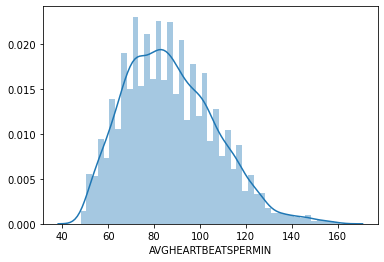

In [33]:
# Seaborn is a Python data visualization library based on matplotlib. It is an easy to use visualisation package that works well with Pandas DataFrames.
# Below are a few examples using Seaborn.

sns.distplot(df['AVGHEARTBEATSPERMIN'].dropna());

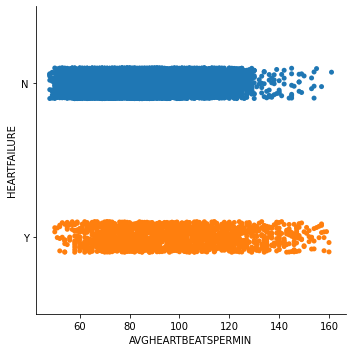

In [39]:
sns.catplot(x='AVGHEARTBEATSPERMIN', y='HEARTFAILURE', data=df);

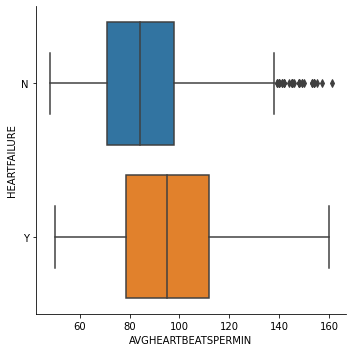

In [40]:
sns.catplot(x='AVGHEARTBEATSPERMIN', y='HEARTFAILURE', kind="box", data=df);

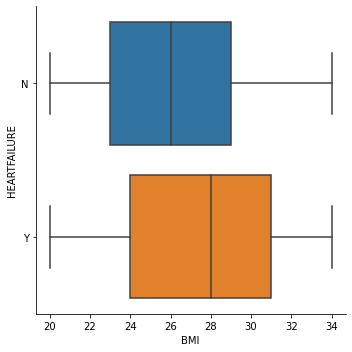

In [41]:
sns.catplot(x='BMI', y='HEARTFAILURE', kind="box", data=df);

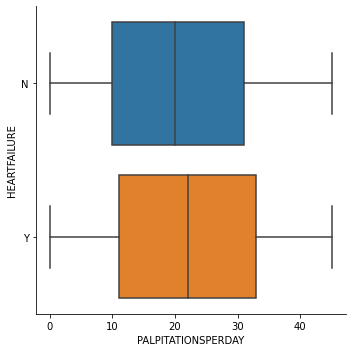

In [42]:
sns.catplot(x='PALPITATIONSPERDAY', y='HEARTFAILURE', kind="box", data=df);

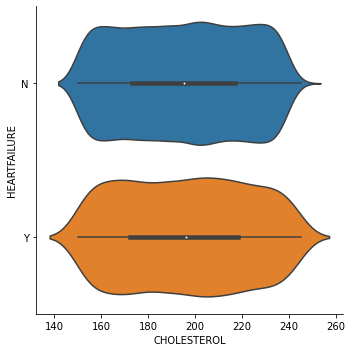

In [43]:
sns.catplot(x='CHOLESTEROL', y='HEARTFAILURE', kind="violin", data=df);

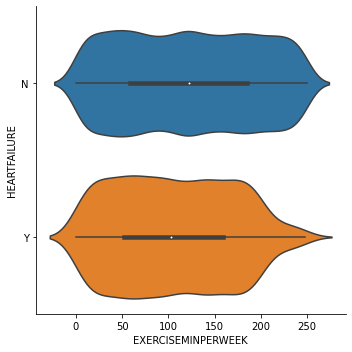

In [44]:
sns.catplot(x='EXERCISEMINPERWEEK', y='HEARTFAILURE', kind="violin", data=df);

In [50]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

AVGHEARTBEATSPERMIN : [ 93 108  86  80  66 125  83 107  92  84  60 134 103 101  82  63  89  69
  96  50  79 116 104  81  85  56  87  62  78 115  68 111 100 124  75  77
  90  76  91  73 114  72  71  95  94 112 122  88  64  55  97 118 110 140
  61 130 102  67  70 119  51  98  99 121  49  74 113 105 139  65  53  54
 117 106  52 109  59 120  58 145 136 133 142 132 135 137 129 154 128 123
 144 148 149 138 153 141 126 143  57 157 127 155 146 150 151 147 131 158
  48 152 160 156 159 161]
PALPITATIONSPERDAY : [22  0 36 27 31 28 12  1  7 39  2 14  9 37 19 35 33 29 24 13 10 18  4 40
 32 11 30 25 23 21 42 26 38  5  8 16  6 34 15  3 20 17 44 43 45 41]
CHOLESTEROL : [163 181 239 164 185 201 169 199 174 206 194 228 237 157 234 155 204 209
 223 197 183 229 230 162 207 217 198 205 187 176 158 184 152 210 159 156
 200 231 188 221 151 177 215 225 232 233 175 170 153 212 219 193 173 150
 222 214 196 182 190 165 171 191 166 227 160 192 189 226 161 238 178 208
 220 154 203 172 167 180 236 202 240 211 179 2

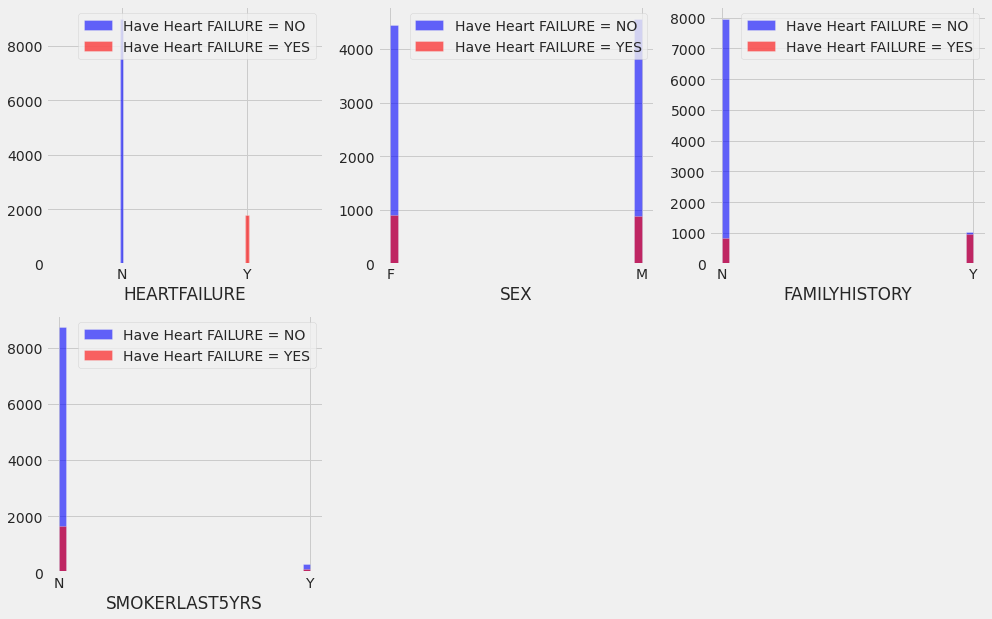

In [61]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["HEARTFAILURE"] == "N"][column].hist(bins=35, color='blue', label='Have Heart FAILURE = NO', alpha=0.6)
    df[df["HEARTFAILURE"] == "Y"][column].hist(bins=35, color='red', label='Have Heart FAILURE = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

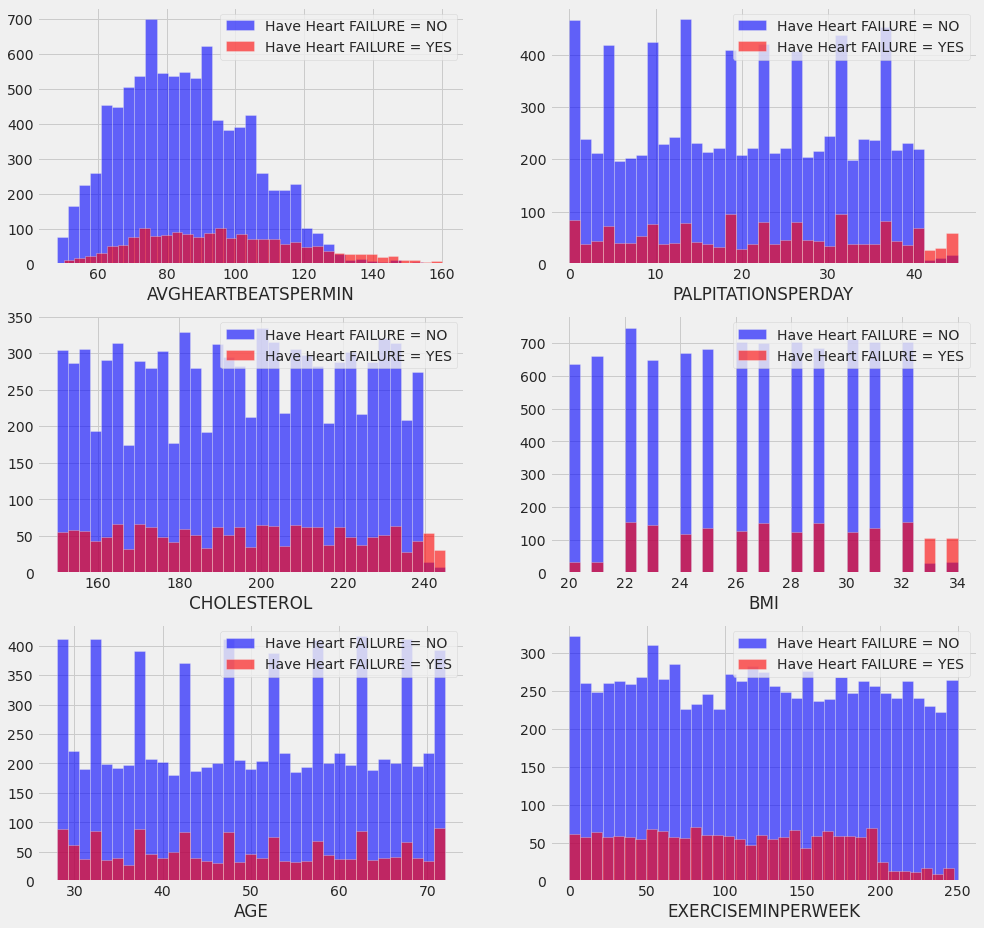

In [62]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["HEARTFAILURE"] == "N"][column].hist(bins=35, color='blue', label='Have Heart FAILURE = NO', alpha=0.6)
    df[df["HEARTFAILURE"] == "Y"][column].hist(bins=35, color='red', label='Have Heart FAILURE = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

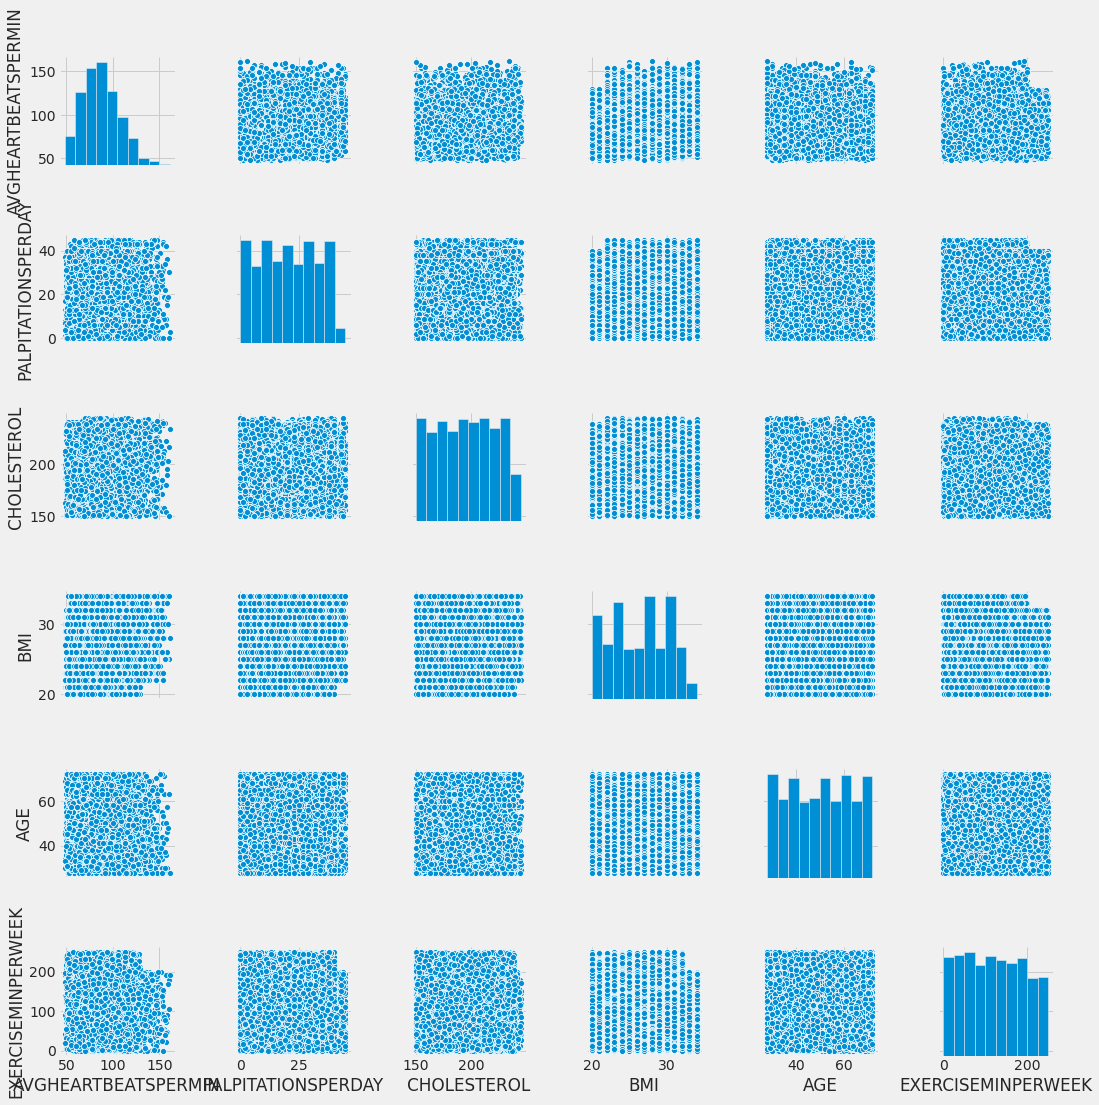

In [65]:
subData = df[['AVGHEARTBEATSPERMIN','PALPITATIONSPERDAY','CHOLESTEROL','BMI','AGE','EXERCISEMINPERWEEK']]
sns.pairplot(subData)